# Data Preparation

In [63]:
suppressMessages(library(CausalImpact))
suppressMessages(library(dplyr))

In [64]:
df <- read.csv("/media//elvyna/DATA//data-analysis//jupyter-notebook/dataset//20180916-bukalapak-campaign.csv")

In [65]:
head(df)

Month,observed,residual,flag
2011-01-01,4,NA,BEFORE_CAMPAIGN
2011-02-01,4,NA,BEFORE_CAMPAIGN
2011-03-01,4,NA,BEFORE_CAMPAIGN
2011-04-01,5,NA,BEFORE_CAMPAIGN
2011-05-01,4,NA,BEFORE_CAMPAIGN
2011-06-01,4,NA,BEFORE_CAMPAIGN


In [66]:
df[df$flag == 'AFTER_FIRST_CAMPAIGN', ] 

,Month,observed,residual,flag
74,2017-02-01,76,"1,1430887",AFTER_FIRST_CAMPAIGN
75,2017-03-01,74,"1,1391250",AFTER_FIRST_CAMPAIGN
76,2017-04-01,64,"0,9988819",AFTER_FIRST_CAMPAIGN
77,2017-05-01,62,"0,9801731",AFTER_FIRST_CAMPAIGN
78,2017-06-01,66,"0,9641711",AFTER_FIRST_CAMPAIGN
79,2017-07-01,60,"0,8742218",AFTER_FIRST_CAMPAIGN


# Analysis

## Causal Impact
### First campaign

In [67]:
pre.period <- as.Date(c('2011-01-01','2016-12-01'))
post.period <- as.Date(c('2017-01-01','2018-09-01'))

In [68]:
time.points <- as.Date(df$Month)
# data <- zoo(cbind(df$observed, df$residual), time.points)
data <- zoo(cbind(df$observed), time.points)

In [69]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

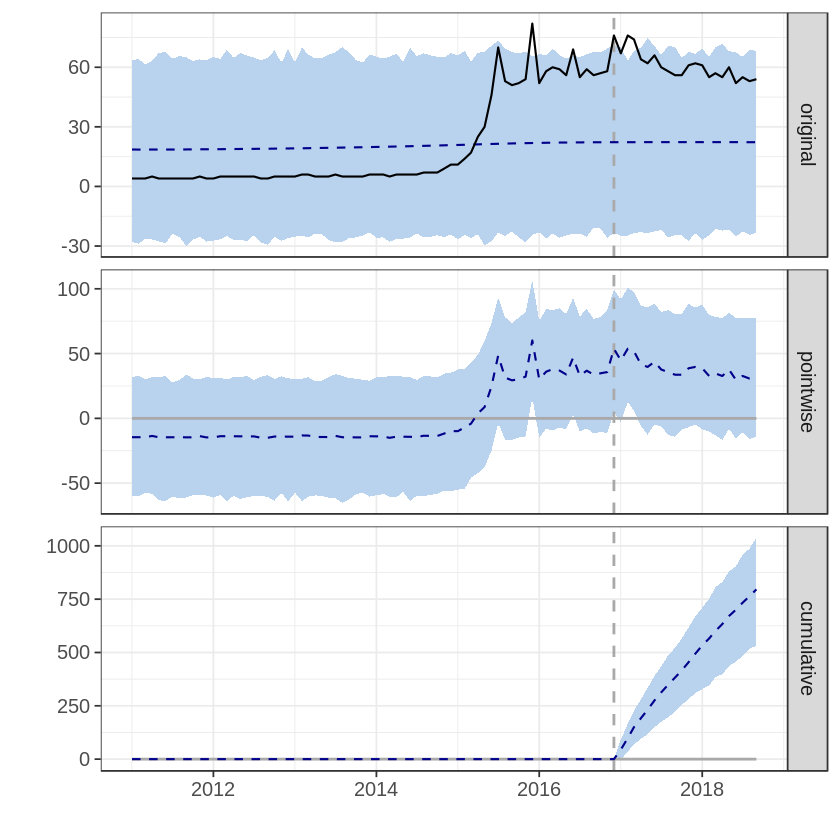

In [70]:
plot(ci)

In [71]:
summary(ci)

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   60             1264        
Prediction (s.d.)        22 (6,1)       468 (127,4) 
95% CI                   [11, 35]       [225, 733]  
                                                    
Absolute effect (s.d.)   38 (6,1)       796 (127,4) 
95% CI                   [25, 49]       [531, 1039] 
                                                    
Relative effect (s.d.)   170% (27%)     170% (27%)  
95% CI                   [113%, 222%]   [113%, 222%]

Posterior tail-area probability p:   0,00102
Posterior prob. of a causal effect:  99,89827%

For more details, type: summary(impact, "report")



In [72]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 60,19. By contrast, in the absence of an intervention, we would have expected an average response of 22,30. The 95% interval of this counterfactual prediction is [10,71, 34,90]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 37,89 with a 95% interval of [25,29, 49,48]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 1,26K. By contrast, had the intervention not taken place, we would have expected a sum of 0,47K. The 95% interval of this prediction is [0,22K, 0,73K].

The above results are given in terms of absolute numbers. In relative terms, the response variable sho

### Second campaign

In [73]:
pre.period <- as.Date(c('2011-01-01','2017-06-01'))
post.period <- as.Date(c('2017-07-01','2018-09-01'))

In [74]:
ci <- CausalImpact(data = data,
                   pre.period = pre.period,
                   post.period = post.period
                  )

Warning message:
“Removed 93 rows containing missing values (geom_path).”Warning message:
“Removed 186 rows containing missing values (geom_path).”

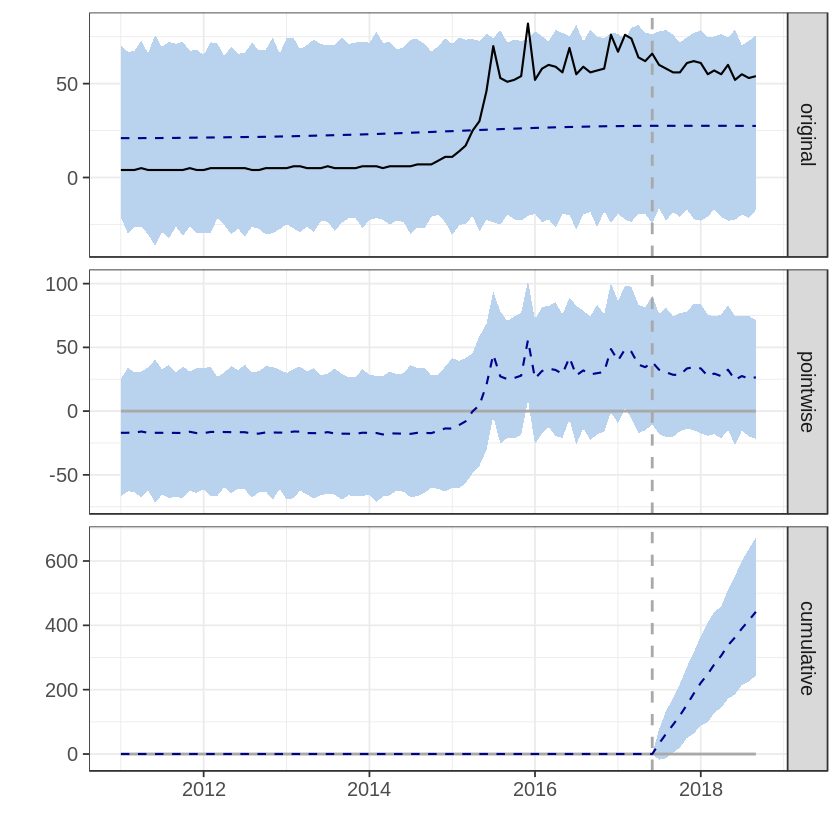

In [75]:
plot(ci)

In [76]:
summary(ci)

Posterior inference {CausalImpact}

                         Average       Cumulative 
Actual                   57            855        
Prediction (s.d.)        28 (7,2)      413 (108,7)
95% CI                   [12, 41]      [182, 611] 
                                                  
Absolute effect (s.d.)   29 (7,2)      442 (108,7)
95% CI                   [16, 45]      [244, 673] 
                                                  
Relative effect (s.d.)   107% (26%)    107% (26%) 
95% CI                   [59%, 163%]   [59%, 163%]

Posterior tail-area probability p:   0,00207
Posterior prob. of a causal effect:  99,79339%

For more details, type: summary(impact, "report")



In [77]:
summary(ci, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 57,00. By contrast, in the absence of an intervention, we would have expected an average response of 27,53. The 95% interval of this counterfactual prediction is [12,13, 40,71]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 29,47 with a 95% interval of [16,29, 44,87]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 855,00. By contrast, had the intervention not taken place, we would have expected a sum of 412,94. The 95% interval of this prediction is [181,93, 610,68].

The above results are given in terms of absolute numbers. In relative terms, the response variable